# **Outliers Detection Techniques**

**An outlier is an observation that is unlike the other observations. It is rare, or distinct, or does not fit in some way. It is also called anomalies.**

**Outliers can have many causes, such as:**

> Measurement or input error.

> Data corruption.

> True outlier observation.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [9]:
df = pd.read_csv("/content/drive/MyDrive/EDA/Lab 7/heart_disease_uci.csv")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [10]:
df.shape

(920, 16)

In [11]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [12]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [13]:
mean_chol = df['chol'].mean()
df['chol'].fillna(mean_chol, inplace=True)

<ipython-input-13-40f6885ac099>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['chol'].fillna(mean_chol, inplace=True)


In [14]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,0
fbs,90
restecg,2
thalch,55


**Let's consider serum cholestoral in mg/dl column i.e. "chol" for our analysis. I'll plot a simple box plot which is the best visualization for detecting outliers**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='chol'>

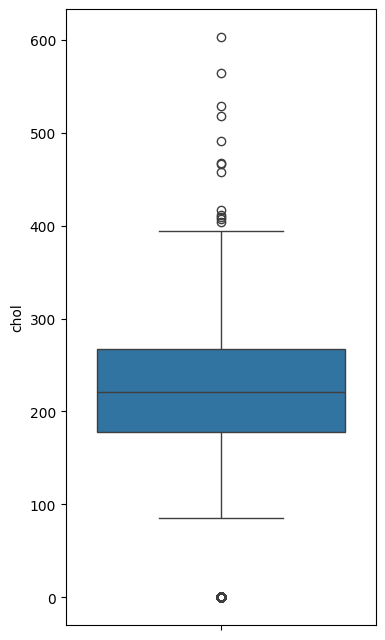

In [20]:
plt.figure(figsize = (4,8))
sns.boxplot(y = df.chol)

**From the above box plot, we can surely observe that there are outliers in it!**

## 1. **Interquartile Range Method**

> The concept of the Interquartile Range (IQR) is used to build the boxplot graphs. IQR is a concept in statistics that is used to measure the statistical dispersion and data variability by dividing the dataset into quartiles.
In simple words, any dataset or any set of observations is divided into four defined intervals based upon the values of the data and how they compare to the entire dataset. A quartile is what divides the data into three points and four intervals.

> It is the difference between the third quartile and the first quartile (IQR = Q3 -Q1). Outliers in this case are defined as the observations that are below (Q1 - 1.5x IQR) or boxplot lower whisker or above (Q3 + 1.5x IQR) or boxplot upper whisker. It can be visually represented by the box plot.

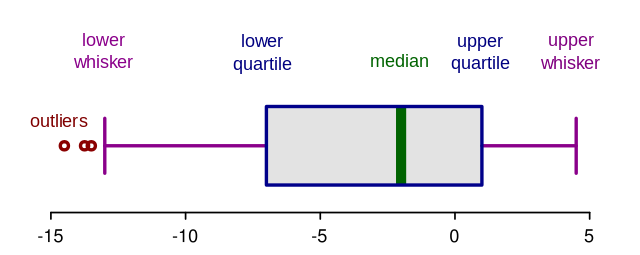

In [25]:
Image(filename='/content/drive/MyDrive/EDA/Lab 7/r1.png')

**Let's define a function to find out the IQR, lower and the upper whisker**

In [28]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)

    # calculate the IQR
    iqr = q75 - q25

    # calculate the outlier cutoff
    cut_off = iqr * 1.5

    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off

    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)

    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [29]:
out_iqr(df,'chol')

The IQR is 89.25
The lower bound value is 43.875
The upper bound value is 400.875
Total number of outliers are 185


**Visual representation:**

<ipython-input-31-07df413efb1f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.chol, kde=False)


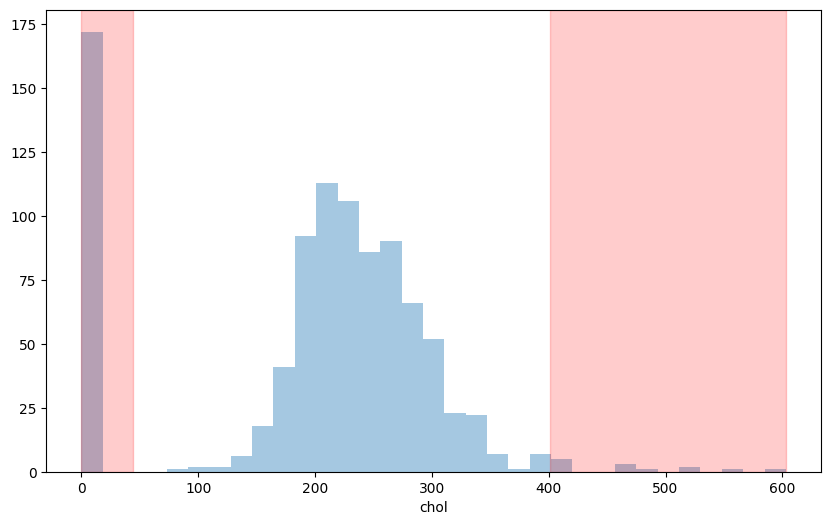

In [31]:
plt.figure(figsize = (10,6))
sns.distplot(df.chol, kde=False)
plt.axvspan(xmin = lower,xmax= df.chol.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df.chol.max(),alpha=0.2, color='red')

**Remedial Measure:**

> Remove the records which are above the upper bound value and records below the lower bound value!

In [32]:
df_new = df[(df['chol'] < upper) | (df['chol'] > lower)]

## 2. **Standard Deviation Method**

> Standard deviation is a metric of variance i.e. how much the individual data points are spread out from the mean. In statistics, If a data distribution is approximately normal then about 68% of the data values lie within one standard deviation of the mean and about 95% are within two standard deviations, and about 99.7% lie within three standard deviations

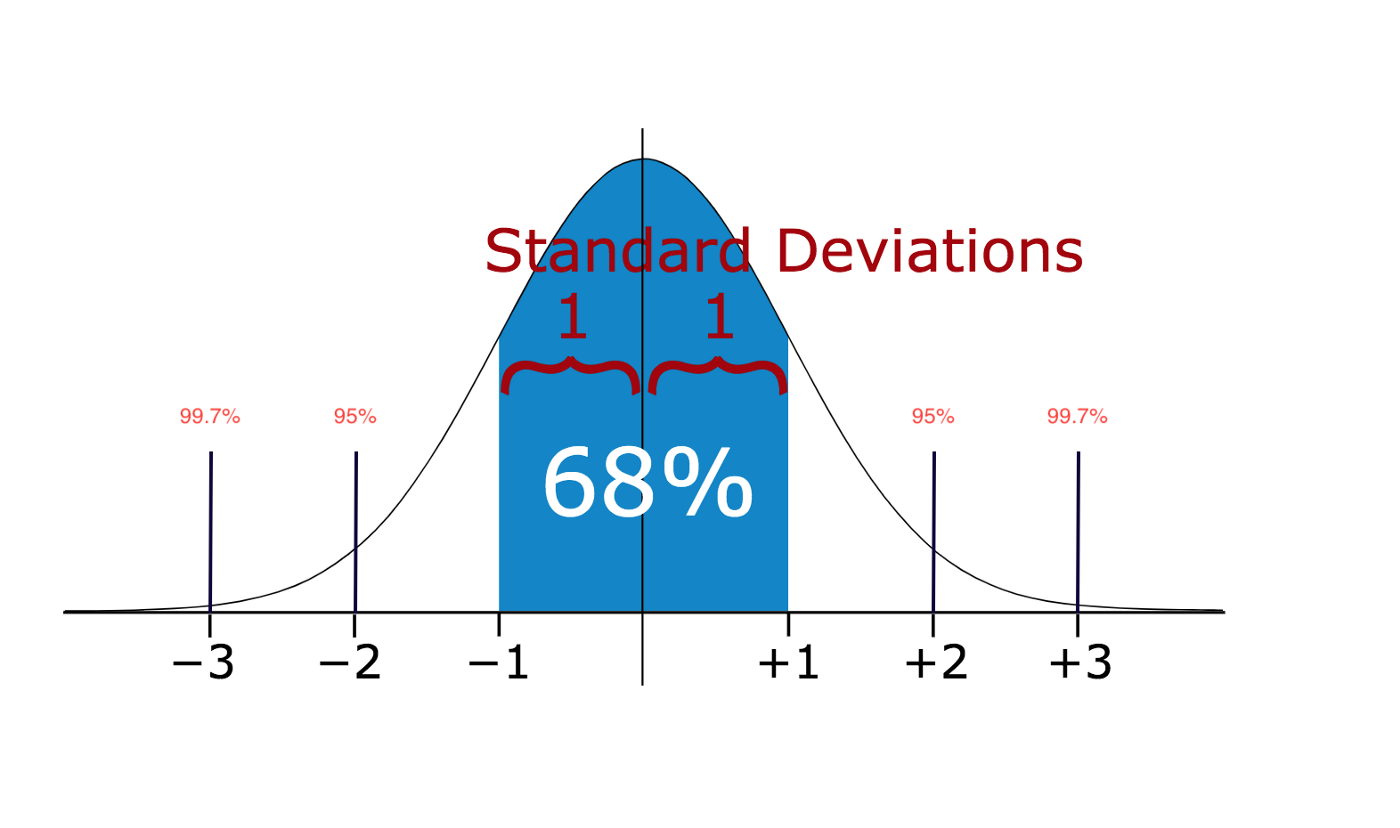

In [33]:
Image(filename='/content/drive/MyDrive/EDA/Lab 7/r2.png')

In [34]:
df_2 = pd.read_csv("/content/drive/MyDrive/EDA/Lab 7/StudentsPerformance.csv")
df_2.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Let's consider the "writing score" for inspection. I'll plot a simple density plot which is also one of the best visualization for detecting outliers**

<ipython-input-39-765b56904f61>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2['writing score'], kde=True)


<Axes: xlabel='writing score', ylabel='Density'>

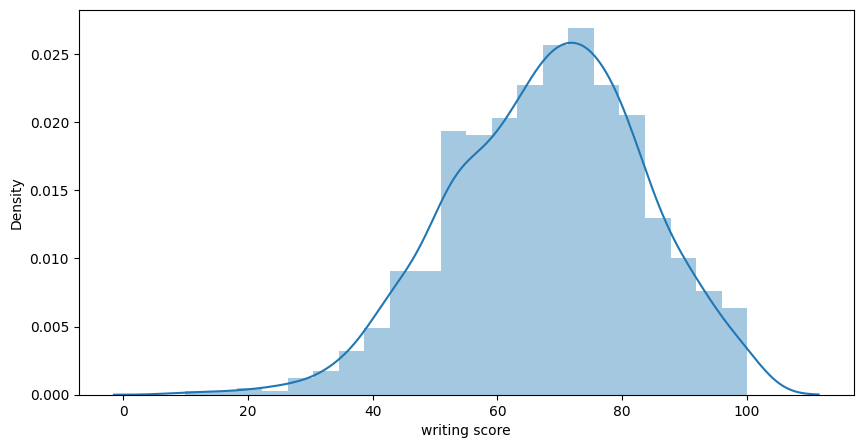

In [39]:
plt.figure(figsize = (10,5))
sns.distplot(df_2['writing score'], kde=True)

**By the looks of it, it is left tailed and it surely has outliers.**

**Let's define a function to find out the lower and the upper whisker using SDM:**

In [41]:
def out_std(df, column):
    global lower,upper

    # calculate the mean and standard deviation of the data frame
    data_mean, data_std = df[column].mean(), df[column].std()

    # calculate the cutoff value
    cut_off = data_std * 3

    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off

    print('The lower bound value is', lower)
    print('The upper bound value is', upper)

    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]

    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [42]:
out_std(df_2,'writing score')

The lower bound value is 22.467028967391073
The upper bound value is 113.64097103260893
Total number of outliers are 4


<ipython-input-43-0c42a8a4b9f9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2['writing score'], kde=False)


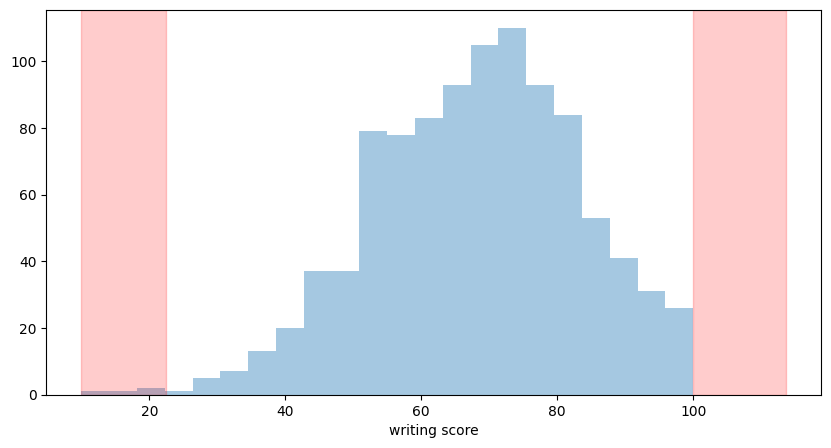

In [43]:
plt.figure(figsize = (10,5))
sns.distplot(df_2['writing score'], kde=False)
plt.axvspan(xmin = lower,xmax= df_2['writing score'].min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df_2['writing score'].max(),alpha=0.2, color='red')

**Here the red zone represents the outlier zone! The records present in that zone are considered as outliers**

**Remedial Measure:**
> Remove the records which are above the upper bound value and records below the lower bound value!


In [44]:
#Data Frame without outliers
df_new = df_2[(df_2['writing score'] < upper) | (df_2['writing score'] > lower)]

## 3. **Z-Score method:**

> The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.
The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.

> Z_score= (Xi - mean) / standard deviation

In [45]:
df_3 = pd.read_csv("/content/drive/MyDrive/EDA/Lab 7/insurance.csv")
df_3.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Let's perform basic EDA to analyse the dataset**

In [46]:
df_3.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [47]:
df_3.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


**Let's consider the "charges" for inspection. I'll plot a simple density plot which is one of the best visualization for detecting outliers**

<ipython-input-49-61a03762d69f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_3['charges'], kde=True)


<Axes: xlabel='charges', ylabel='Density'>

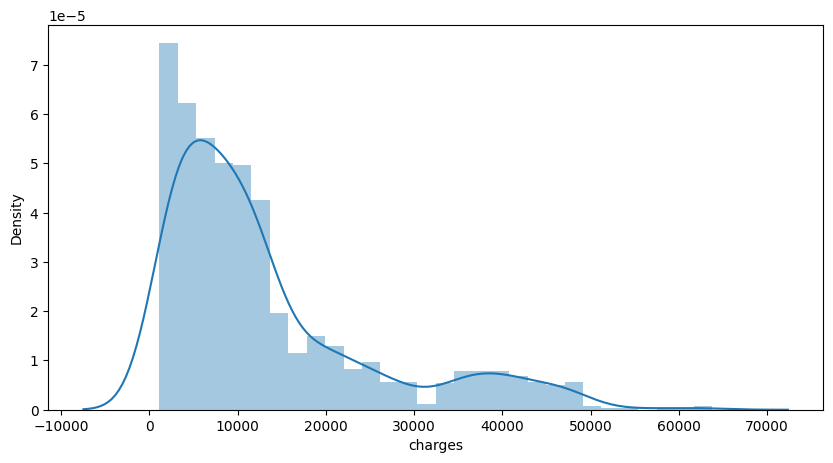

In [49]:
plt.figure(figsize = (10,5))
sns.distplot(df_3['charges'], kde=True)

**By the looks of it, it is right tailed and it surely has outliers**

**Let's define a function to find out the lower and the upper whisker using Z-Score method:**

In [50]:
def out_zscore(data):
    global outliers,zscore
    outliers = []
    zscore = []

    threshold = 3

    mean = np.mean(data)
    std = np.std(data)

    for i in data:
        z_score= (i - mean)/std
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)

    return print("Total number of outliers are",len(outliers))

In [51]:
out_zscore(df_3.charges)

Total number of outliers are 7


**According to z-score method, it has 7 outliers**

<ipython-input-52-9d610b74ef1b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(zscore)


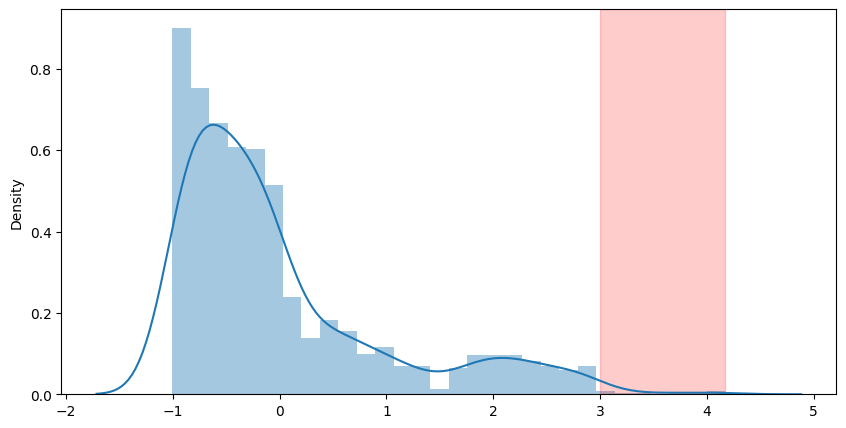

In [52]:
plt.figure(figsize = (10,5))
sns.distplot(zscore)
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red')

**Here the red zone represents the outlier zone! The records present in that zone are considered as outliers**

**Remedial Measure:**

> Remove the records which are above the upper bound value and records below the lower bound value!

In [53]:
df_new = df_3[(df_3['charges'] < 3) | (df_3['charges'] > -3)]